Summary analysis of the tech grants found using the model trained and predictions made on the FortyTwo internal dataset.
- How many tech grants
- How much money they equate to
- Trends over time - money and proportion
- Trends in subject areas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tech_grants_predictions = pd.read_csv('../data/processed/predictions/210403/all_grants_fortytwo_info_210420_tagged.csv')
grants_data = pd.read_csv('../data/raw/wellcome-grants-awarded-2005-2019.csv')

In [5]:
tech_grants_predictions.drop_duplicates(subset=['Grant ID'], inplace=True)
grants_data.drop_duplicates(subset=['Internal ID'], inplace=True)

In [6]:
grants_data = pd.merge(
    grants_data,
    tech_grants_predictions,
    how='left',
    left_on='Internal ID',
    right_on='Grant ID'
)

In [7]:
len(grants_data)

16854

In [9]:
grants_data['Amount Awarded'] = grants_data['Amount Awarded'].apply(lambda x: x.replace(',','')).astype(int)

In [10]:
grants_data['Award Date'] = pd.to_datetime(grants_data['Award Date'])

In [11]:
tech_grants_data = grants_data[grants_data['Tech grant prediction']==1]

## How many tech grants

In [12]:
grants_data['Tech grant prediction'].value_counts()

0.0    13859
1.0     2994
Name: Tech grant prediction, dtype: int64

In [13]:
num_tech_grants = len(tech_grants_data)
print(f'There were {num_tech_grants} tech grants predicted in',
      f'{len(grants_data)} grants - {round(num_tech_grants*100/len(grants_data),2)}%')

There were 2994 tech grants predicted in 16854 grants - 17.76%


## How much money they equate to

In [14]:
grants_data['Currency'].value_counts()

GBP    16854
Name: Currency, dtype: int64

In [15]:
amount_tech_grants = sum(tech_grants_data['Amount Awarded'])
total_amount = grants_data['Amount Awarded'].sum()
print(f'The amount awarded for tech grants was £{amount_tech_grants}',
      f'out of £{total_amount} total funding for these grants ',
      f'- {round(amount_tech_grants*100/total_amount,2)}%')

The amount awarded for tech grants was £1969715337 out of £8226246517 total funding for these grants  - 23.94%


## Trends over time
- tech grants over time
- money over time

In [16]:
grants_data_per_year = grants_data.groupby(grants_data['Award Date'].dt.year)
tech_grants_data_per_year = tech_grants_data.groupby(tech_grants_data['Award Date'].dt.year)

In [17]:
prop_tech = {}
prop_money = {}
for year, total_num in grants_data_per_year['Award Date'].count().items():
    tech_num = tech_grants_data_per_year['Award Date'].count().loc[year]
    prop_tech[year] = tech_num/total_num
    total_money = grants_data_per_year['Amount Awarded'].sum().loc[year]
    tech_money = tech_grants_data_per_year['Amount Awarded'].sum().loc[year]
    prop_money[year] = tech_money/total_money

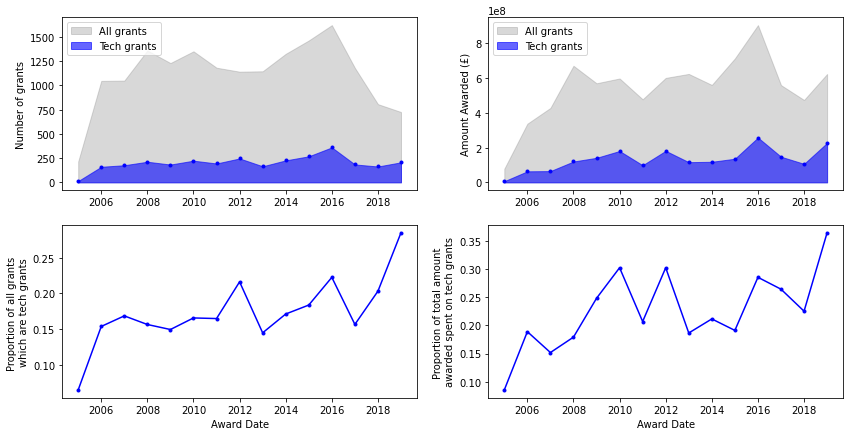

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,7))

## Plot 1
x = grants_data_per_year['Award Date'].count().index
y = grants_data_per_year['Award Date'].count().tolist()
# plt.plot(x, y, marker='.', linewidth=0, color='grey')
ax1.fill_between(x, y, 0,
                 facecolor="grey",
                 color='grey',
                 alpha=0.3, label='All grants')
x_tech = tech_grants_data_per_year['Award Date'].count().index
y_tech = tech_grants_data_per_year['Award Date'].count().tolist()
ax1.plot(x_tech, y_tech, marker='.', linewidth=0, color='blue')
ax1.fill_between(x_tech, y_tech, 0,
                 facecolor="blue",
                 color='blue',
                 alpha=0.6, label='Tech grants')
ax1.set(ylabel='Number of grants')
ax1.legend(loc='upper left');

## Plot 2
x = grants_data_per_year['Amount Awarded'].sum().index
y = grants_data_per_year['Amount Awarded'].sum().tolist()
ax2.fill_between(x, y, 0,
                 facecolor="grey",
                 color='grey',
                 alpha=0.3, label='All grants')
x_tech = tech_grants_data_per_year['Amount Awarded'].sum().index
y_tech = tech_grants_data_per_year['Amount Awarded'].sum().tolist()
ax2.plot(x_tech, y_tech, marker='.', linewidth=0, color='blue')
ax2.fill_between(x_tech, y_tech, 0,
                 facecolor="blue",
                 color='blue',
                 alpha=0.6, label='Tech grants');
# plt.ylim(0, max(y))
ax2.set(ylabel='Amount Awarded (£)')
ax2.legend(loc='upper left');

## Plot 3

# Proportion of grants being tech grants over time
x = prop_tech.keys()
y = prop_tech.values()
ax3.plot(x, y, marker='.', color='blue')
ax3.set(xlabel='Award Date', ylabel='Proportion of all grants \nwhich are tech grants');

## Plot 4

# Proportion of money being for tech grants over time
x = prop_money.keys()
y = prop_money.values()
ax4.plot(x, y, marker='.', color='blue')
ax4.set(xlabel='Award Date', ylabel="Proportion of total amount \nawarded spent on tech grants");

In [19]:
year = 2016
print(tech_grants_data_per_year['Amount Awarded'].count()[year])
print(tech_grants_data_per_year['Amount Awarded'].sum()[year])
print(prop_tech[year])
print(prop_money[year])

361
258085938
0.22256473489519113
0.28515987390420616


In [20]:
year = 2019
print(tech_grants_data_per_year['Amount Awarded'].count()[year])
print(tech_grants_data_per_year['Amount Awarded'].sum()[year])
print(prop_tech[year])
print(prop_money[year])

207
227268620
0.28512396694214875
0.36422532196354945


## Funding areas

In [21]:
type_num = grants_data['Grant Programme:Title'].value_counts()
tech_type_num = tech_grants_data['Grant Programme:Title'].value_counts()

In [22]:
top_n = 20
top_tech_types_num = tech_type_num[:top_n].index

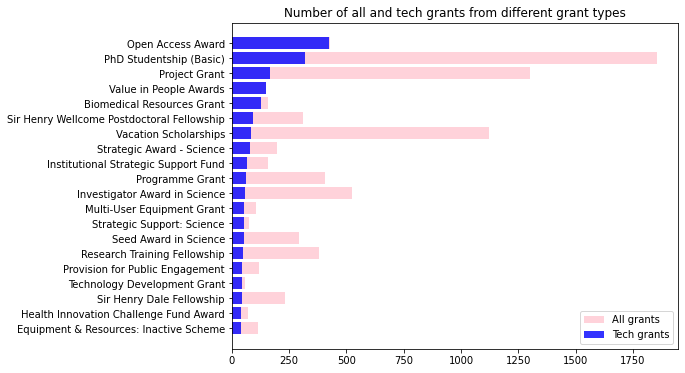

In [23]:
plt.figure(figsize=(8,6))
plt.barh(top_tech_types_num, type_num[top_tech_types_num], color = 'pink', alpha = 0.7, label='All grants')
plt.barh(top_tech_types_num, tech_type_num[top_tech_types_num], color = 'blue', alpha = 0.8, label='Tech grants')
plt.gca().invert_yaxis()
plt.legend();
plt.title('Number of all and tech grants from different grant types');

In [24]:
type_prop = grants_data['Grant Programme:Title'].value_counts(normalize=True)
tech_type_prop = tech_grants_data['Grant Programme:Title'].value_counts(normalize=True)

In [25]:
top_n = 20
top_tech_types = tech_type_prop[:top_n].index

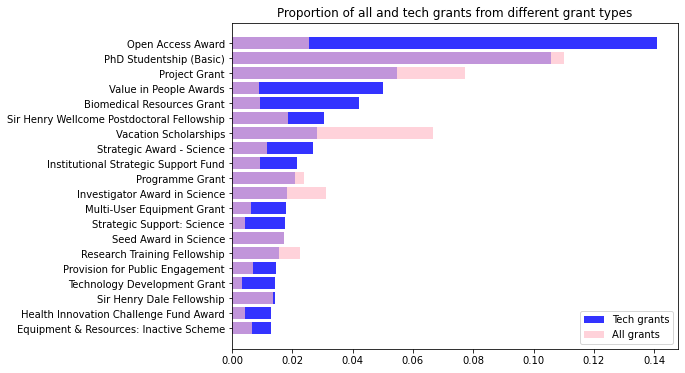

In [26]:
plt.figure(figsize=(8,6))
plt.barh(top_tech_types, tech_type_prop[top_tech_types], color = 'blue', alpha = 0.8, label='Tech grants')
plt.barh(top_tech_types, type_prop[top_tech_types], color = 'pink', alpha = 0.7, label='All grants')
plt.gca().invert_yaxis()
plt.legend();
plt.title('Proportion of all and tech grants from different grant types');

In [27]:
tech_type_prop_of_all = {}
for grant_type, grant_type_num in type_num.items():
    if grant_type in tech_type_num:
        tech_type_prop_of_all[grant_type] = tech_type_num[grant_type]/grant_type_num
    else:
        tech_type_prop_of_all[grant_type] = 0

In [28]:
# Only include when n of total is over a threshold
n_thresh = 30
grant_types_large = type_num[type_num > n_thresh].index
tech_type_prop_of_all_large = {k:v for k,v in tech_type_prop_of_all.items() if k in grant_types_large}

In [29]:
tech_type_prop_of_all_ordered = pd.Series(tech_type_prop_of_all_large).sort_values()

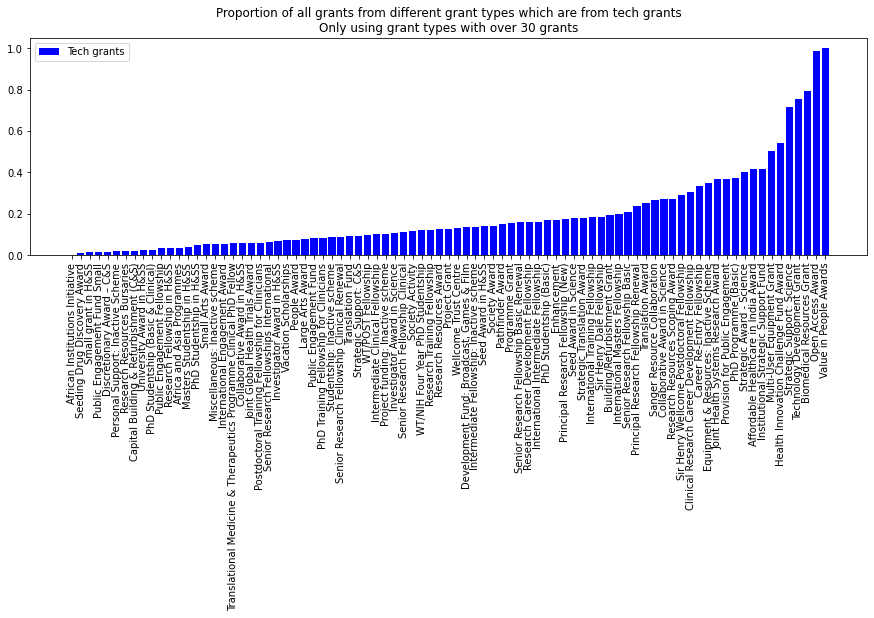

In [30]:
# plt.figure(figsize=(10,20))
plt.figure(figsize=(15,4))
plt.bar(
    tech_type_prop_of_all_ordered.index,
    tech_type_prop_of_all_ordered,
    color = 'blue', label='Tech grants')
# plt.gca().invert_yaxis()
plt.xticks(rotation = 90)
plt.legend();
plt.title(f'Proportion of all grants from different grant types which are from tech grants\nOnly using grant types with over {n_thresh} grants');

In [31]:
def print_outs_grant_type(grant_type):
    print(f'{grant_type}:')
    print(f'Total number of grants: {type_num[grant_type]}')
    print(f'Total number of tech grants: {tech_type_num[grant_type]}')
    print(f'Proportion of grants are tech grants: {round(tech_type_prop_of_all[grant_type],3)}')
    print(f'Proportion of all grants: {round(type_prop[grant_type],3)}')
    print(f'Proportion of all tech grants: {round(tech_type_prop[grant_type],3)}')

In [32]:
print_outs_grant_type('Biomedical Resources Grant')

Biomedical Resources Grant:
Total number of grants: 159
Total number of tech grants: 126
Proportion of grants are tech grants: 0.792
Proportion of all grants: 0.009
Proportion of all tech grants: 0.042


In [33]:
print_outs_grant_type('Technology Development Grant')

Technology Development Grant:
Total number of grants: 57
Total number of tech grants: 43
Proportion of grants are tech grants: 0.754
Proportion of all grants: 0.003
Proportion of all tech grants: 0.014


In [34]:
print_outs_grant_type('Open Access Award')

Open Access Award:
Total number of grants: 428
Total number of tech grants: 422
Proportion of grants are tech grants: 0.986
Proportion of all grants: 0.025
Proportion of all tech grants: 0.141


In [35]:
print_outs_grant_type('PhD Studentship (Basic)')

PhD Studentship (Basic):
Total number of grants: 1856
Total number of tech grants: 317
Proportion of grants are tech grants: 0.171
Proportion of all grants: 0.11
Proportion of all tech grants: 0.106


In [36]:
print_outs_grant_type('Value in People Awards')

Value in People Awards:
Total number of grants: 150
Total number of tech grants: 150
Proportion of grants are tech grants: 1.0
Proportion of all grants: 0.009
Proportion of all tech grants: 0.05


In [37]:
print_outs_grant_type('Strategic Support: Science')

Strategic Support: Science:
Total number of grants: 74
Total number of tech grants: 53
Proportion of grants are tech grants: 0.716
Proportion of all grants: 0.004
Proportion of all tech grants: 0.018
